In [1]:
import re 
import pdfplumber

import csv

DATE_STRING = '2020-06-03'

outfile = 'covid_active_workplaces_0603.csv'
outfileh = open(outfile, 'w')
writer = csv.writer(outfileh)

writer.writerow(['workplace','address1','address2', 'county', 'start', 'end', 'cases', 'report_date'])
file = "../or_weekly_reports/COVID-19-Weekly-Report-%s-FINAL.pdf" % DATE_STRING
pdf = pdfplumber.open(file)



In [2]:
settings = {
    "vertical_strategy": "lines", 
    "horizontal_strategy": "words",
    "snap_tolerance": 3,
    "join_tolerance": 3,
    "edge_min_length": 3,
    "min_words_vertical": 3,
    "min_words_horizontal": 1,
    "keep_blank_chars": False,
    "text_tolerance": 3,
    "text_x_tolerance": None,
    "text_y_tolerance": None,
    "intersection_tolerance": 3,
    "intersection_x_tolerance": None,
    "intersection_y_tolerance": None,
}


In [3]:

pagenumber = 8

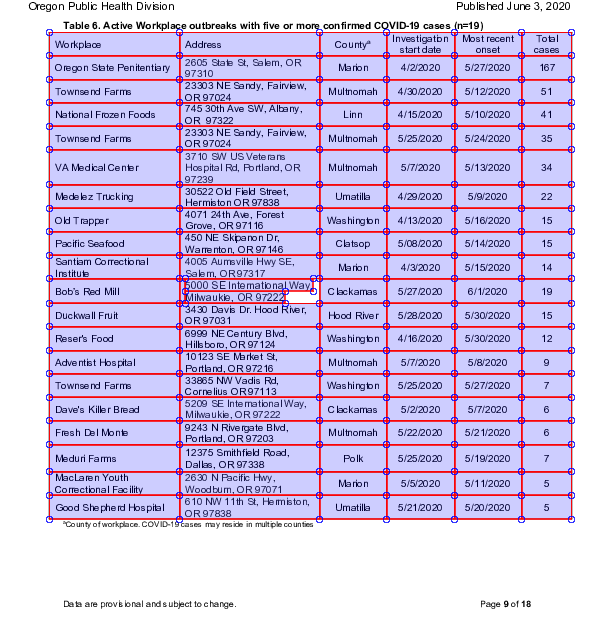

In [4]:
#im = pdf.pages[pagenumber].to_image()
width = pdf.pages[pagenumber].width
height = pdf.pages[pagenumber].height
box1 = (0, 150,  width, height)

cropped_page = pdf.pages[pagenumber].crop(box1) 
im = cropped_page.to_image()
im.debug_tablefinder()

In [5]:
table_found = cropped_page.extract_table(table_settings={})
result_count = len(table_found)
# Skip the header row
for i in range(1,result_count):
    this_row = table_found[i]

    if not this_row[0]:
        # hack for misread 
        print("Empty-ish row, continuing")
        continue
    print(len(this_row))
    assert len(this_row)==7
    print(this_row)
    this_row.append(DATE_STRING)
    writer.writerow(this_row)
    

7
['Oregon State Penitentiary', '2605 State St, Salem, OR \n97310', None, 'Marion', '4/2/2020', '5/27/2020', '167']
7
['Townsend Farms', '23303 NE Sandy, Fairview, \nOR 97024', None, 'Multnomah', '4/30/2020', '5/12/2020', '51']
7
['National Frozen Foods', '745 30th Ave SW, Albany, \nOR  97322', None, 'Linn', '4/15/2020', '5/10/2020', '41']
7
['Townsend Farms', '23303 NE Sandy, Fairview, \nOR 97024', None, 'Multnomah', '5/25/2020', '5/24/2020', '35']
7
['VA Medical Center', '3710 SW US Veterans \nHospital Rd, Portland, OR \n97239', None, 'Multnomah', '5/7/2020', '5/13/2020', '34']
7
['Medelez Trucking', '30522 Old Field Street, \nHermiston OR 97838', None, 'Umatilla', '4/29/2020', '5/9/2020', '22']
7
['Old Trapper', '4071 24th Ave, Forest \nGrove, OR 97116', None, 'Washington', '4/13/2020', '5/16/2020', '15']
7
['Pacific Seafood', '450 NE Skipanon Dr, \nWarrenton, OR 97146', None, 'Clatsop', '5/08/2020', '5/14/2020', '15']
7
['Santiam Correctional \nInstitute', '4005 Aumsville Hwy SE, \

In [6]:
## that's the end! In other reports there might be more. 

In [7]:
outfileh.close()
